In [1]:
import generateverctor
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
vectors, labels, uni, filename, features = generateverctor.vectoriser('count', stem=False, stop=False)

In [3]:
df = pd.DataFrame(vectors.toarray(), index=filename, columns=features)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8282 entries, http:^^www.cs.cornell.edu^Info^People^divakar^divakar.html to http:^^www-sal.cs.uiuc.edu^~torrella^
Columns: 89763 entries, 0 to zzz
dtypes: int64(89763)
memory usage: 5.5+ GB


In [5]:
colsums = df.sum(axis=0)

In [6]:
colsums.sort_values(ascending=False)[:10]

the    115857
of      76610
and     68894
to      53301
a       50653
in      42440
for     30500
is      27852
0       27121
1       23794
dtype: int64

In [7]:
(colsums==1).sum(), (colsums==1).mean()

(42365, 0.47196506355625367)

In [8]:
colnonzeros = (df!=0).sum(axis=0)

In [9]:
colnonzeros[colsums.sort_values(ascending=False)[:10].index]

the    6599
of     6888
and    6456
to     6243
a      5656
in     5672
for    5469
is     4656
0      3280
1      8141
dtype: int64

In [37]:
vectors, labels, uni, filename, features = generateverctor.vectoriser('count', stem=True, stop=True)
df_clean = pd.DataFrame(
    vectors.toarray(), 
    index=pd.MultiIndex.from_arrays([labels,uni], names=['class','uni']), 
    columns=features
)

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8282 entries, (student, cornell) to (faculty, misc)
Columns: 74433 entries, 0 to zzz
dtypes: int64(74433)
memory usage: 4.6+ GB


In [12]:
for l in set(labels):
    print('<{:s}>'.format(l))
    colsums_clean = df_clean[np.array(labels)==l].sum(axis=0)
    print(colsums_clean.sort_values(ascending=False)[:10])

<student>
comput     3744
content    3229
page       3213
gmt        3187
1996       3161
1          3099
scienc     2566
home       2392
univers    2304
last       2145
dtype: int64
<course>
1          3480
1996       2526
cours      2451
comput     2372
program    2287
2          2256
cs         2230
assign     2150
3          2112
content    1782
dtype: int64
<other>
0          24328
1          13033
comput      8610
program     8202
use         7931
2           7562
00          7398
content     7263
1996        6819
gmt         6661
dtype: int64
<faculty>
comput      5474
scienc      2825
system      2656
1           2603
1996        2465
research    2462
univers     2456
content     2166
gmt         2125
program     1601
dtype: int64
<department>
comput      1082
scienc       861
depart       748
inform       487
server       406
1996         399
univers      389
page         372
research     358
content      340
dtype: int64
<staff>
comput      453
page        314
1           284

In [13]:
colsums_clean = df_clean.sum(axis=0)

In [14]:
(colsums_clean == 1).mean()

0.48732417073072426

In [20]:
df_clean['__class'] = labels
df_clean['__uni'] = uni

In [53]:
df_groupsum = df_clean.groupby(level=[0, 1]).sum()
df_groupsum

0    00  000  0000  00000  000000  0000000  \
class      uni                                                          
course     cornell        89    61    0     0      0       0        0   
           misc          396   656    1     0      0       0        0   
           texas          81    53    0     0      0       0        0   
           washington      5    32    0     0      0       0        0   
           wisconsin      58   213    1     0      0       0        0   
department cornell         2     0    0     0      0       0        0   
           misc           65    26    1     0      0       0        0   
           texas           2     0    0     0      0       0        0   
           washington      0     0    0     0      0       0        0   
           wisconsin       0     0    0     0      0       0        0   
faculty    cornell        72     5    4     0      0       0        0   
           misc          393   235  127     0      0       0        0   
           texas          98     4    0     0      0       0        0   
           washington      0     6    1     0      0       0        0   
           wisconsin       5    10    0     0      0       0        0   
other      cornell      1495   293   36     0      0       0        0   
           misc        19382  5997   41    93      0       0        2   
           texas        1093   283   18     1      0       0        0   
           washington    818   351   46     5      0       1        0   
           wisconsin    1540   474   61   205      9      11        1   
project    cornell        48     2    0     0      0       0        0   
           misc          172   228    4     0      0       0        0   
           texas          37     5    2     0      0       0        0   
           washington      1     1    0     0      0       0        0   
           wisconsin      13     2    0     0      0       0        0   
staff      cornell        37     2    0     0      0       0        0   
           misc           17    22    1     0      0       0        0   
           texas           6     0    0     0      0       0        0   
           washington      1     2    0     0      0       0        0   
           wisconsin       1     2    2     0      0       0        0   
student    cornell       265    26    0     0      0       0        0   
           misc          585   183   10     0      0       0        0   
           texas         321    16    0     0      0       0        0   
           washington     12    34    2     1      0       0        0   
           wisconsin      11    45    0     0      0       0        0   

                       00000000  00000000000000000000000  \
class      uni                                             
course     cornell            0                        0   
           misc               0                        0   
           texas              0                        0   
           washington         0                        0   
           wisconsin          0                        0   
department cornell            0                        0   
           misc               0                        0   
           texas              0                        0   
           washington         0                        0   
           wisconsin          0                        0   
faculty    cornell            0                        0   
           misc               0                        0   
           texas              0                        0   
           washington         0                        0   
           wisconsin          0                        0   
other      cornell            0                        0   
           misc               0                        0   
           texas              0                        0   
           washington         0                        0   
           wisconsin          3                        2   
proje

In [140]:
common_terms = set()
for c in set(labels):
    for u in set(uni):
        common_terms.update(df_groupsum.loc[c].sort_values(axis=1, by=u, ascending=False).columns[:5])
len(common_terms),common_terms

(47,
 {'0',
  '00',
  '01',
  '1',
  '1996',
  '2',
  '200',
  '3',
  '96',
  '97',
  'assign',
  'audio',
  'austin',
  'award',
  'comput',
  'content',
  'cornel',
  'cours',
  'cs',
  'cse',
  'data',
  'depart',
  'edu',
  'gmt',
  'group',
  'includ',
  'inform',
  'latex',
  'lectur',
  'monday',
  'object',
  'page',
  'postscript',
  'program',
  'project',
  'report',
  'research',
  'scienc',
  'scout',
  'search',
  'server',
  'system',
  'univers',
  'use',
  'utc',
  'washington',
  'work'})

In [141]:
a = df_groupsum[list(common_terms)].T

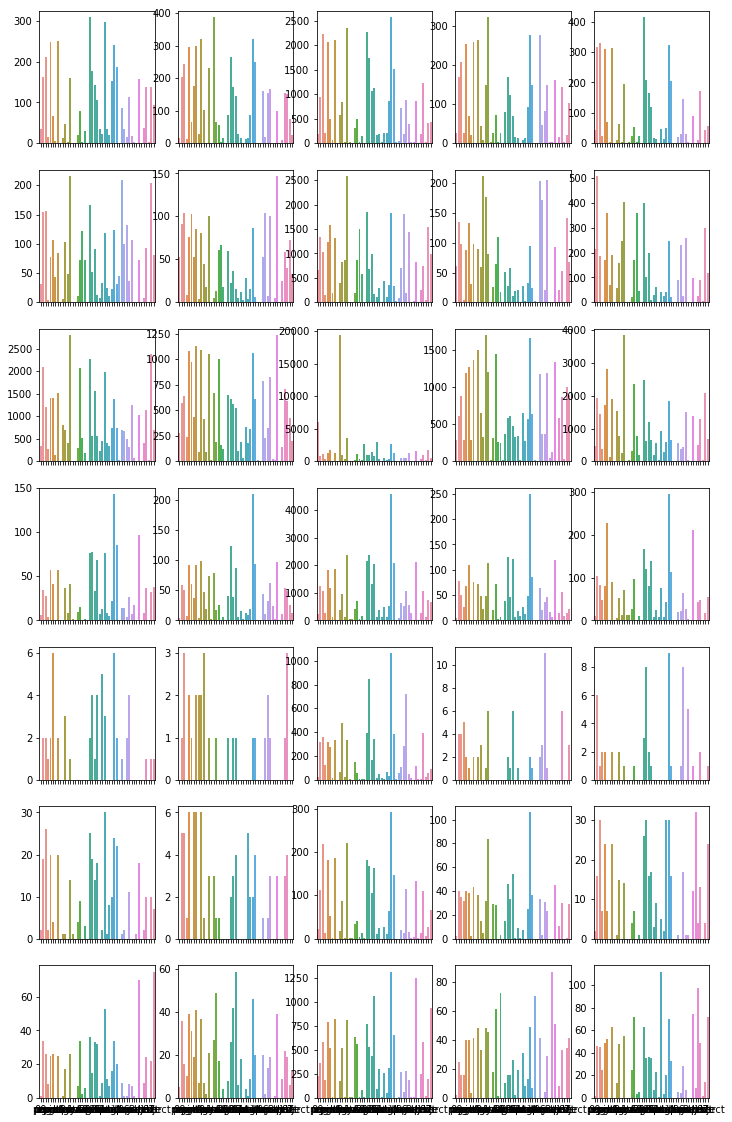

In [165]:
fig, ax = plt.subplots(7,5,figsize=(12,20), sharex=True)
for i,c in enumerate(set(labels)):
    for j,u in enumerate(set(uni)):
        sns.barplot(a[(c,u)].index, a[(c,u)].values, ax=ax[i,j])

In [127]:
a[('course','cornell')].iloc[:5].values

array([ 61, 134,  98,   4,  71], dtype=int64)

In [79]:
a = {1, 2}
a.update(set(df_groupsum.loc['course'].sort_values(axis=1, by='cornell', ascending=False).columns[:10]))
a

{1,
 '1',
 2,
 '2',
 '3',
 '4',
 '96',
 'cours',
 'cs',
 'homework',
 'lectur',
 'program'}

In [ ]:
indices.sum()